In [1]:
# import libraries and modules 
import numpy as np
import sympy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

In [2]:
# The symbols and the derivatives which will be used for later calculations

x1, y1, x2, y2 = sp.symbols(r'x_1 y_1 x_2 y_2',real = True)

m1, m2, g , t= sp.symbols(r'm_1 m_2 g t', real = True, positive = True)

th1 = sp.Function(r'\theta_1')(t)
th2 = sp.Function(r'\theta_2')(t)

th1_d = sp.diff(th1, t)
th2_d = sp.diff(th2, t)
th1_dd = sp.diff(th1_d, t)
th2_dd = sp.diff(th2_d, t)

# the lengths of the 2 pendulums
l1 = 2
l2 = 1

In [3]:
# The relationship of x and y with the angle of the pendulum
x1 = l1*sp.sin(th1)
y1 = -l1*sp.cos(th1)
x2 = l2*sp.sin(th2) + x1
y2 = -l2*sp.cos(th2) + y1

x1_d = sp.diff(x1, t)
y1_d = sp.diff(y1, t)
x2_d = sp.diff(x2, t)
y2_d = sp.diff(y2, t)

In [4]:
# the x and y functions which will be later used to get the values of the x and y coordinates of the 2 pendulums.
x1_f = sp.lambdify(th1, x1)
y1_f = sp.lambdify(th1, y1)
x2_f = sp.lambdify((th1,th2), x2)
y2_f = sp.lambdify((th1, th2), y2)

In [5]:
# Kinetic enegy
T1 = 1/2 * m1 * (x1_d**2 + y1_d**2)
T2 = 1/2 * m2 * (x2_d**2 + y2_d**2)
T = T1+T2
# Potential energy
V1 = m1*g*y1
V2 = m2*g*y2
V = V1 + V2
# Lagrangian
L = T-V
L

2*g*m_1*cos(\theta_1(t)) - g*m_2*(-2*cos(\theta_1(t)) - cos(\theta_2(t))) + 0.5*m_1*(4*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + 4*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m_2*((2*sin(\theta_1(t))*Derivative(\theta_1(t), t) + sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (2*cos(\theta_1(t))*Derivative(\theta_1(t), t) + cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)

In [6]:
# The lagranfe's equations
LE1 = sp.diff(sp.diff(L, th1_d), t).simplify() - sp.diff(L, th1)
LE2 = sp.diff(sp.diff(L, th2_d), t).simplify() - sp.diff(L, th2)

In [7]:
# solving the lagrange's equationn for the second derivatives of theta1 and theta2
sols = sp.solve([LE1, LE2], (th1_dd, th2_dd))
sols[th1_dd]

g*m_1*sin(\theta_1(t))/(-2.0*m_1 + 2.0*m_2*cos(\theta_1(t) - \theta_2(t))**2 - 2.0*m_2) + g*m_2*sin(\theta_1(t))/(-2.0*m_1 + 2.0*m_2*cos(\theta_1(t) - \theta_2(t))**2 - 2.0*m_2) - g*m_2*sin(\theta_2(t))*cos(\theta_1(t) - \theta_2(t))/(-2.0*m_1 + 2.0*m_2*cos(\theta_1(t) - \theta_2(t))**2 - 2.0*m_2) + 2.0*m_2*sin(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2/(-2.0*m_1 + 2.0*m_2*cos(\theta_1(t) - \theta_2(t))**2 - 2.0*m_2) - 2.0*m_2*sin(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/(-2.0*m_1 + 2.0*m_2*cos(\theta_1(t) - \theta_2(t))**2 - 2.0*m_2) - m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/(-2.0*m_1 + 2.0*m_2*cos(\theta_1(t) - \theta_2(t))**2 - 2.0*m_2) + m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2/(-2.0*m_1 + 2.0*m_2*cos(\theta_1(t) - \theta_2(t))**2 - 2.0*m_2) + 2.0*m_2*sin(\theta_1(t))*cos(\theta_1(t) - \theta_2(t

In [8]:
# Converting the second derivatives to actual numeric conditions which can be used to actually solve the differential equations.
deriv2_th2_f = sp.lambdify([g,m1, m2, th1, th2, th1_d, th2_d], sols[th2_dd])
deriv2_th1_f = sp.lambdify([g, m1, m2, th1, th2, th1_d, th2_d], sols[th1_dd])

deriv1_th1_f = sp.lambdify(th1_d, th1_d)
deriv1_th2_f = sp.lambdify(th2_d, th2_d)

# Equations to solve in this system are:

-   $\frac{d\theta_1}{dt} = v_1$
-     $\frac{dv_1}{dt} = sols[th1\_dd]$
-     $\frac{d\theta_2}{dt} = v_2$
-     $\frac{dv_2}{dt} = sols[th2\_dd]$

$$\therefore S = (\theta_1, v_1, \theta_2, v_2)$$ 

In [9]:
# The derivative function wjich depends upon S and t and contains all information regatding the 4 differential eqations.
def dSdt(S, t):
    return [ deriv1_th1_f(S[1]), #d(theta)/dt
            deriv2_th1_f(9.81, 2, 1, S[0], S[2], S[1], S[3]), # (dv1/dt)
            deriv1_th2_f(S[3]),  #d(theta2}/dt
            deriv2_th2_f(9.81, 2, 1, S[0], S[2], S[1], S[3]) #dv2/dt
           ]

#Initial conditions
th1_0 = np.pi/2
v1_0 = 0
th2_0 = -np.pi/2
v2_0 = 0
S0 = [th1_0, v1_0, th2_0, v2_0]

In [10]:
# solving the equations 10001 times from 0 to 40
t = np.linspace(0, 40, 1001)
solution = odeint(dSdt, y0 = S0, t = t)

In [11]:
# Required solutions
theta1 = solution.T[0]
theta2 = solution.T[2]

In [12]:
# The coordinates of the 2 pendulums which will be used to plot the data
x1_pts = x1_f(theta1)
x2_pts = x2_f(theta1, theta2)
y1_pts = y1_f(theta1)
y2_pts = y2_f(theta1, theta2)

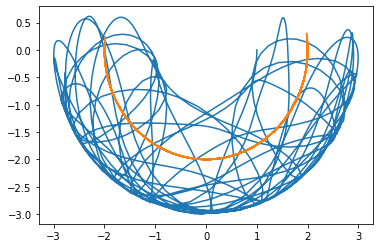

In [13]:
plt.plot(x2_pts, y2_pts)
plt.plot(x1_pts, y1_pts)

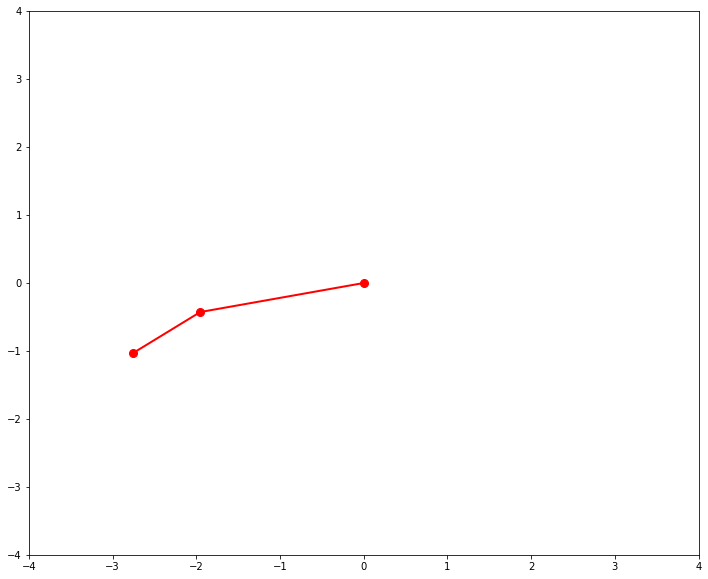

In [14]:
# An animation of the above system
# The number of frames are the number of datapoints in between each second. So, this animation is in real time.
fig, ax = plt.subplots(1,1, figsize=(12,10))
ax.set_facecolor('w')
line, = plt.plot([], [], 'ro-', lw=2, markersize=8)
ax.set(ylim=(-4,4), xlim=(-4,4))
def animate(i):
    line.set_data([0, x1_pts[i], x2_pts[i]], [0, y1_pts[i], y2_pts[i]])
    return line,
anim = FuncAnimation(fig, animate, frames=1000, interval=50)
anim.save('double_pendulum.gif',writer='pillow',fps=25)